In [1]:
import scipy.io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

import torch
import torch.utils.data

import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision import transforms

from torchsummary import summary

# Load Model

In [2]:
#model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [4]:
def load_model(path):
    if torch.cuda.is_available():
        return torch.load(path)
    else:
        return torch.load(path, map_location=torch.device('cpu'))

In [7]:
cd

C:\Users\Student


In [8]:
model = load_model("./PyTorchProjekte/models/model-half.pt")

In [9]:
summary(model,input_size=(3,2048,1024));

Layer (type:depth-idx)                   Param #
├─GeneralizedRCNNTransform: 1-1          --
├─BackboneWithFPN: 1-2                   --
|    └─IntermediateLayerGetter: 2-1      --
|    |    └─Conv2d: 3-1                  (9,408)
|    |    └─FrozenBatchNorm2d: 3-2       --
|    |    └─ReLU: 3-3                    --
|    |    └─MaxPool2d: 3-4               --
|    |    └─Sequential: 3-5              (212,992)
|    |    └─Sequential: 3-6              (1,212,416)
|    |    └─Sequential: 3-7              (7,077,888)
|    |    └─Sequential: 3-8              (14,942,208)
|    └─FeaturePyramidNetwork: 2-2        --
|    |    └─ModuleList: 3-9              (984,064)
|    |    └─ModuleList: 3-10             (2,360,320)
|    |    └─LastLevelMaxPool: 3-11       --
├─RegionProposalNetwork: 1-3             --
|    └─AnchorGenerator: 2-3              --
|    └─RPNHead: 2-4                      --
|    |    └─Conv2d: 3-12                 590,080
|    |    └─Conv2d: 3-13                 771
|    |   

# Look at Images

In [10]:
frames_path = './PyTorchProjekte/datasets/MOT16-14-raw_frames/'
frame_names = list(sorted(os.listdir(frames_path)))

In [11]:
transform = transforms.Compose([            
transforms.ToTensor(),                     
])

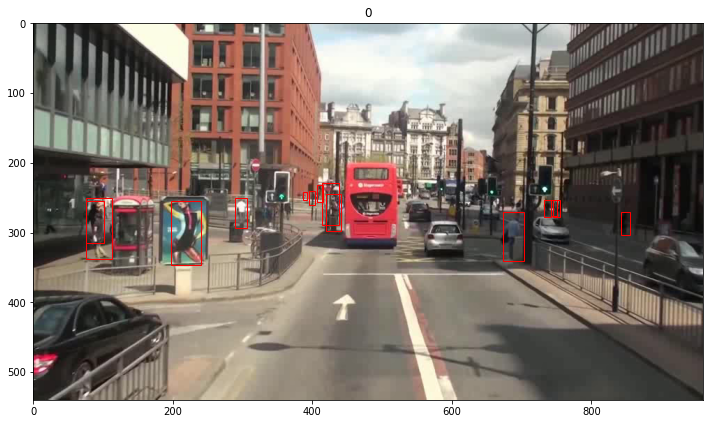

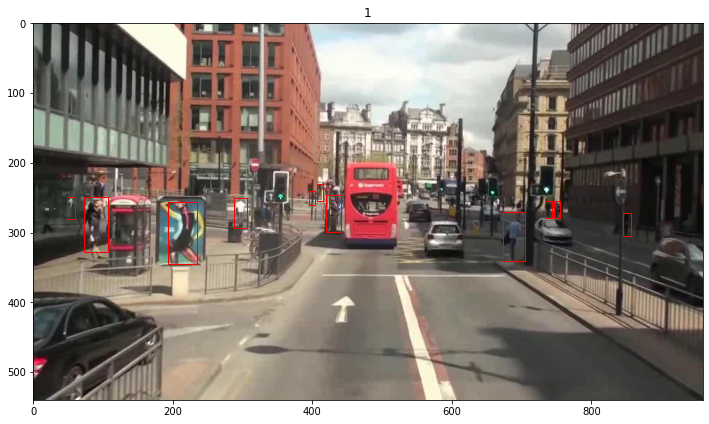

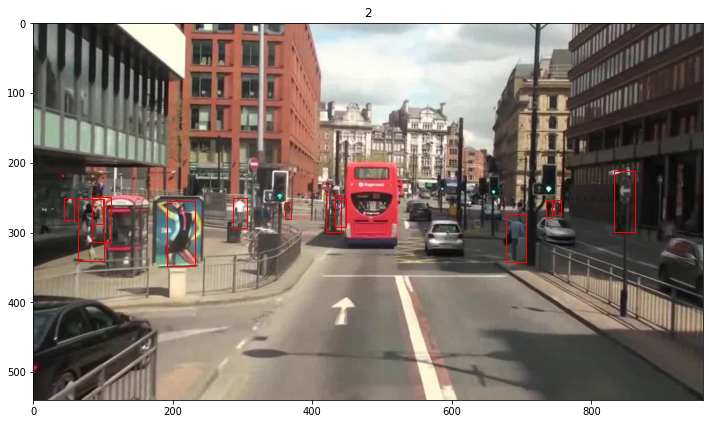

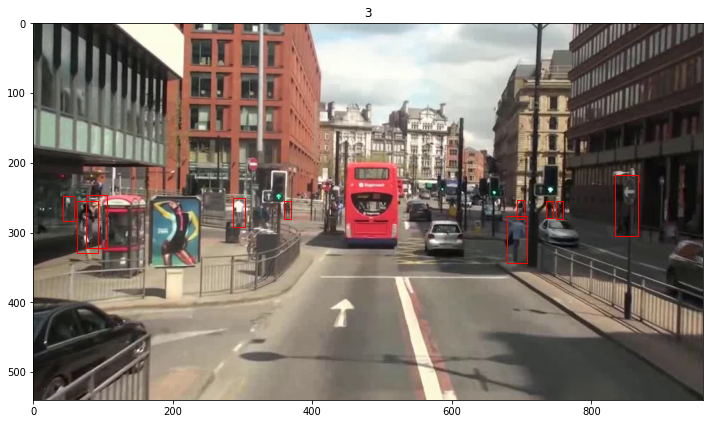

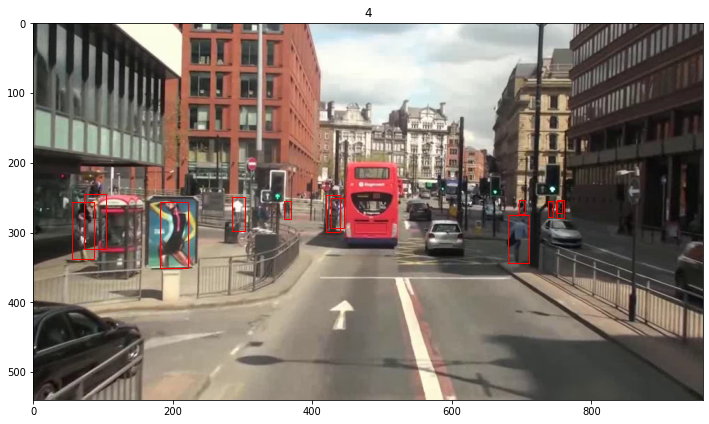

In [12]:
model.eval()
for idx in range(0,5):
    frame = Image.open(frames_path + frame_names[idx])
    img = torch.unsqueeze(transform(frame),0)
    model.eval()
    with torch.no_grad():
        prediction = model(img)[0]
        
    #img = convert_back(img, img_raw)
        
    preds = prediction['boxes'] # predicted bboxes
    preds = preds.cpu().data.numpy() # to numpy array
    scores = prediction['scores'] # scores of predicted bboxes
    scores = scores.cpu().data.numpy()
    
    threshold = .5
    highs = list(np.where(scores > threshold)[0])
    bboxes_x0x1y0y1 = []
    
    for high in highs:
        bboxes_x0x1y0y1.append(list(preds[high]))
    
    bboxes = []
    for bbox in bboxes_x0x1y0y1:
        bbox = list(bbox)
        x0, y0 = bbox[0], bbox[1]
        x1, y1 = bbox[2], bbox[3]

        bboxes.append([x0, y0, x1 - x0, y1 - y0])
        
    plt.rcParams['figure.figsize'] = [12, 8]

    fig, ax = plt.subplots()

    ax.imshow(frame);
    
    # bbox = [x, y, w, h]
    for bbox in bboxes:
        rect = patches.Rectangle(
            (bbox[0], bbox[1]), bbox[2], bbox[3], 
            linewidth=1, edgecolor='red',linestyle ='-', facecolor='none')
        ax.add_patch(rect)   

    
    
    plt.title(idx)
    #plt.show()
    #fig.savefig('./Frames_boxes/t0_5'+ frame_names[idx] ,format = 'png')
